In [1]:
import pandas as pd
import numpy as np
import env

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import env
import acquire
import prepare

In [2]:
df = acquire.wrangle_mall()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()

,customer_id,age,annual_income,spending_score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.shape

(200, 5)

In [6]:
cols = df.columns.to_list()

#for col in cols:
    #plt.hist(df[col])

In [7]:
#q1, q3 = df['spending_score'].quantile([0.25, 0.75])
#q1, q3

In [8]:
k=1.5
#column

In [9]:
q1, q3  = df['annual_income'].quantile(q=[0.25, 0.75])
iqr = q3 - q1

In [10]:
lower_bound = q1 - (k * iqr)
upper_bound = q3 + (k * iqr)

In [11]:
high_items = df['annual_income'] > upper_bound
low_items = df['annual_income'] < lower_bound

In [12]:
df[~high_items & ~low_items]

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
193,194,Female,38,113,91
194,195,Female,47,120,16
195,196,Female,35,120,79
196,197,Female,45,126,28


In [13]:
def outlier_ejector(dataframe, column, k=1.5):
    """
    This function takes in a dataframe and looks for upper outliers.
    """
    q1, q3  = dataframe[column].quantile(q=[0.25, 0.75])
    iqr = q3 - q1
    
    
    lower_bound = q1 - (k * iqr)
    upper_bound = q3 + (k * iqr)
    
    high_items = dataframe[column] > upper_bound
    low_items = dataframe[column] < lower_bound

    
    return dataframe[~low_items & ~high_items]

In [14]:
def outlier_detector(dataframe, column, k=1.5):
    """
    This function takes in a dataframe and looks for upper outliers.
    """
    q1, q3  = dataframe[column].quantile(q=[0.25, 0.75])
    iqr = q3 - q1
    
    
    lower_bound = q1 - (k * iqr)
    upper_bound = q3 + (k * iqr)
    
    high_items = dataframe[column] > upper_bound
    low_items = dataframe[column] < lower_bound

    
    return dataframe[low_items & high_items]

In [15]:
new_df = outlier_ejector(df, 'annual_income')

In [16]:
outlier_df = outlier_detector(df, 'annual_income')

In [17]:
new_df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
age_bins = [0,25,35,45,55,70]
age_labels = [25,35,45,55,70]

In [19]:
#df['age_bins'] = pd.cut(x= df.age, bins=age_bins, labels=age_labels)

In [20]:
#df = pd.get_dummies(data=df,columns=['gender','age_bins'])

In [21]:
train, val, test = prepare.train_validate(df)

In [22]:
cont_columns = ['annual_income','spending_score', 'age']

In [23]:
train_scaled, val_scaled, test_scaled = prepare.scale_zillow(train, val, test, cont_columns, scaler_model = 1)

In [24]:
train_scaled.head()

,customer_id,gender,age,annual_income,spending_score
109,110,Male,0.96,0.545455,0.489130
135,136,Female,0.22,0.659091,0.923913
5,6,Female,0.08,0.022727,0.793478
127,128,Male,0.44,0.636364,1.000000
170,171,Male,0.44,0.818182,0.108696


In [25]:
X = train[['age', 'annual_income']]

In [26]:
seed = 1969

kmeans = KMeans(n_clusters=3, random_state=seed)

kmeans.fit(X)

kmeans.predict(X) #Outputs an array of clusters (0-2) for each row

array([2, 1, 0, 1, 1, 2, 1, 0, 1, 1, 2, 0, 2, 2, 1, 1, 0, 2, 2, 1, 0, 1,
       1, 2, 2, 1, 1, 2, 1, 2, 1, 0, 1, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 1, 2, 2, 0, 2, 0, 1, 0,
       1, 2, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 0, 1, 0, 1, 2, 0], dtype=int32)

In [27]:
X['unscaled_clusters'] = kmeans.predict(X)
X.head()

,age,annual_income,unscaled_clusters
109,66,63,2
135,29,73,1
5,22,17,0
127,40,71,1
170,40,87,1


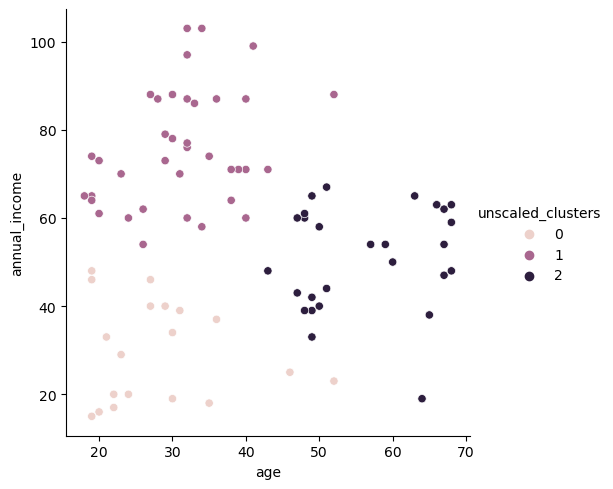

In [28]:
sns.relplot(data=X, x='age', y='annual_income', hue='unscaled_clusters')

In [29]:
X = train_scaled[['age', 'annual_income']]

seed = 1969

kmeans_scaled = KMeans(n_clusters=3, random_state=seed)

kmeans_scaled.fit(X[['age', 'annual_income']])

kmeans_scaled.predict(X[['age', 'annual_income']]) #Outputs an array of clusters (0-2) for each row

X['scaled_clusters'] = kmeans_scaled.predict(X)
X.head()

,age,annual_income,scaled_clusters
109,0.96,0.545455,1
135,0.22,0.659091,0
5,0.08,0.022727,2
127,0.44,0.636364,0
170,0.44,0.818182,0


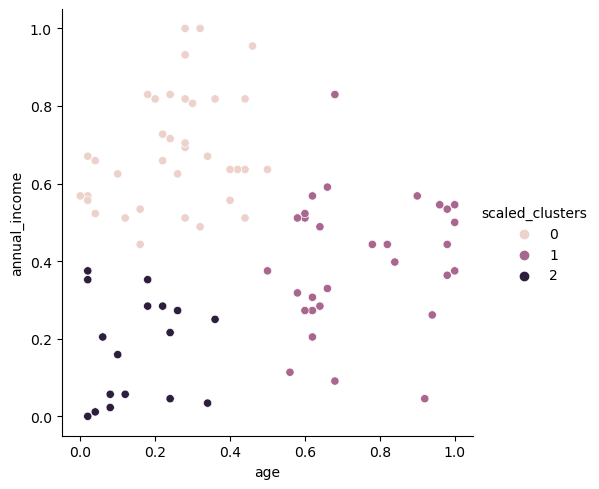

In [30]:
sns.relplot(data=X, x='age', y='annual_income', hue='scaled_clusters')

Should drop origonal columns so the machine learning algo doesn't double dip. Could have no affect on the model results.

In [31]:
kmeans_scaled.cluster_centers_

array([[0.25166667, 0.68592172],
       [0.75870968, 0.40652493],
       [0.15058824, 0.17513369]])

In [32]:
kmeans.cluster_centers_

array([[28.        , 29.73684211],
       [31.16216216, 75.7027027 ],
       [56.57142857, 51.35714286]])

In [33]:
kmeans_scaled.inertia_

3.6936523391256886

In [34]:
kmeans.inertia_

18001.726681568787

In [38]:
inertia = []

for n in range(1, 11):
    
    kmeans = KMeans(n_clusters=n, random_state=seed)
    
    kmeans.fit(X[['age', 'annual_income']])
    
    inertia.append({'n_clusters': n,
                    'inertia': kmeans.inertia_})
    
inertia

[{'n_clusters': 1, 'inertia': 12.777780145611963},
 {'n_clusters': 2, 'inertia': 6.824335546495778},
 {'n_clusters': 3, 'inertia': 3.6936523391256886},
 {'n_clusters': 4, 'inertia': 2.8699786203517217},
 {'n_clusters': 5, 'inertia': 2.059022469804037},
 {'n_clusters': 6, 'inertia': 1.5683138550613756},
 {'n_clusters': 7, 'inertia': 1.3446556266736018},
 {'n_clusters': 8, 'inertia': 1.132700999955623},
 {'n_clusters': 9, 'inertia': 0.9847813189272847},
 {'n_clusters': 10, 'inertia': 0.8935348997782522}]

In [42]:
inertia = pd.DataFrame(inertia)

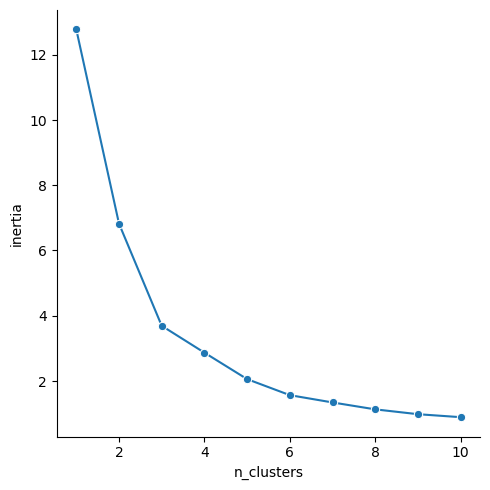

In [48]:
sns.relplot(data=inertia, x='n_clusters', y='inertia', kind='line', marker='o')

### Looking for the most acute angle. How to do that in math?
- The number of clusters is specific to these specific features.
- Number of angles is n-1 points.
- num_angles = len(df)-1